## Imports

In [2]:
from functions.my_imports import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
from functions.my_functions import *

In [4]:
%matplotlib inline

In [4]:
PATH = '/home/nbuser/data/house_prices/'

In [5]:
!ls {PATH}

house_test.csv	house_train.csv


## The Data

In [6]:
df_train = pd.read_csv(f'{PATH}house_train.csv', low_memory=False)
df_test = pd.read_csv(f'{PATH}house_test.csv', low_memory=False)

In [7]:
df_train.shape

(1460, 81)

In [8]:
# display_full(df_train)

In [9]:
df_test.shape

(1459, 80)

In [10]:
df_test['SalePrice'] = np.nan

In [11]:
# display_full(df_test)

In [12]:
data = pd.concat([df_train, df_test], axis=0)

In [13]:
data.shape

(2919, 81)

In [14]:
df = data.drop(columns = 'Id', axis=1)

In [15]:
# df.describe().T

## Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [16]:
df.SalePrice = np.log(df.SalePrice)
df.SalePrice.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

## Proprocessing
Dealing with null values and categorical variables before processing the data with a regression function

In [17]:
display_full(df.isnull().sum())

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

Here is a list of numeric and categorical variables where the missing data is due to the absense of the feature and shall not be imputed

- Alley (No alley access)
- MasVnrType, MasVnrArea (Masonry not available thus ares missing and shall not be imputed)
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, TotalBsmtSF (No basement)
- FireplaceQu (No fireplace)
- GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond   (No Garage)
- PoolQC (No pool)
- Fence (No fence)
- MiscFeature (No features)

In [18]:
list_missing = ['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                'BsmtFinSF1', 
                'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 
                'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

From the above list, if variable is categorical, then replace it with "None" else if numeric replace with zero

In [19]:
for i in list_missing:
    if i in df._get_numeric_data():
        df[i] = df[i].fillna(0)
    elif i not in df._get_numeric_data():
        df[i] = df[i].fillna('None')
display_full (df.isnull().sum())

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           1
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

For the remaining variables, this is data missing and shall be imputed to be capable of running the algorithm. For a start, I will impute the median for all numerical variables

In [20]:
fillna_median(df, 'SalePrice')

In [21]:
display_full (df.isnull().sum())

MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

Some few remaining categorical variables will be randomly assigned to None

In [22]:
for i in df.drop(columns = 'SalePrice', axis=1):
    df[i] = df[i].fillna('None')

In [23]:
display_full (df.isnull().sum())

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [24]:
df_2 = df.copy()

## Replacing Categorical with Numerical Values

In [25]:
# Converting all object series to categories
conv_cat(df_2)

In [26]:
# Converting catergorical variables to numeric
cat_to_numeric(df_2)

In [31]:
# Resetting index, should have been done when merging 2 dataframes above
df_raw = df_2.reset_index(drop=True)

But let's save this file for now, since it's already in format can we be stored and accessed efficiently.

In [4]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/houses-raw')

NameError: name 'df_raw' is not defined

## Initial Processing

In [5]:
df_raw = pd.read_feather('tmp/houses-raw')

In [6]:
df_train  = df_raw.iloc[:1459]

In [7]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_train.drop(columns = "SalePrice", axis=1), df_train.SalePrice)
m.score(df_train.drop(columns = "SalePrice", axis=1),df_train.SalePrice)

0.9765493497761044

This illustrates how using all our data can lead to overfitting. A validation set helps diagnose this problem.

In [8]:
df_train.shape

(1459, 80)

In [9]:
# Assign df_x and Y to seperate datasets for better use
y = df_train['SalePrice']
df_x = df_train.drop(columns = "SalePrice", axis=1)

In [10]:
df_x.shape

(1459, 79)

In [11]:
def split_vars(a, n):
    return a[:n].copy(), a[n:].copy()

In [12]:
n_valid = 700
n_trn = len(df_x)-n_valid
raw_train, raw_valid = split_vars(df_train, n_trn) # split train dataset including SalePrice
X_train, X_valid = split_vars(df_x, n_trn) # Split X (df_x) set
Y_train, Y_valid = split_vars(y, n_trn) # Split Y (SalePrice) 

In [13]:
X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape

((759, 79), (700, 79), (759,), (700,))

# Random Forest

## Basic Modeling

In [14]:
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

In [58]:
def print_score(m):
    res = [(rmse(m.predict(X_train), Y_train), rmse(m.predict(X_valid), Y_valid),
           m.score(X_train, Y_train), m.score(X_valid, Y_valid))]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [20]:
m = RandomForestRegressor(n_estimators=1, max_depth=3,n_jobs=-1)
%time m.fit(X_valid, Y_valid) 
print_score(m)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 123 ms
[(0.24445362687337688, 0.20461976661203257, 0.6495944294399492, 0.7161452609774888)]


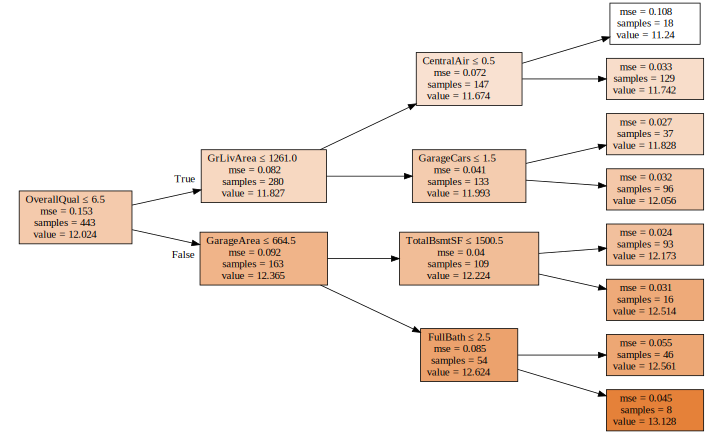

In [21]:
draw_tree(m.estimators_[0], X_train, precision=3)

In [22]:
m = RandomForestRegressor(n_estimators=1,n_jobs=-1)
%time m.fit(X_valid, Y_valid) 
print_score(m)

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 128 ms
[(0.21479726490828674, 0.12512119887056883, 0.7294574833920625, 0.8938639860220873)]


## Bagging

In [22]:
# Run it with the default estimator (tree in sklearn language) of 10
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_valid, Y_valid) 
print_score(m)

CPU times: user 148 ms, sys: 4 ms, total: 152 ms
Wall time: 340 ms
[(0.16243131358871543, 0.065819876345881, 0.8452902998340467, 0.970629245482264)]


After running 10 trees, we want to extract the estimator of each of the trees which is stored in the estimators_ attribute in sklearn

In [50]:
preds = np.stack([i.predict(X_valid) for i in m.estimators_])
preds[:,0], np.mean(preds[:,0]), Y_valid[759]

(array([12.54611, 12.57764, 12.57764, 12.57764, 12.64433, 12.57764, 12.92391, 12.57764, 13.05301, 12.61818]),
 12.667372656889752,
 12.577636201962656)

None of the predictions has a proper predictions but the mean was actually good

In [35]:
preds.shape

(10, 700)

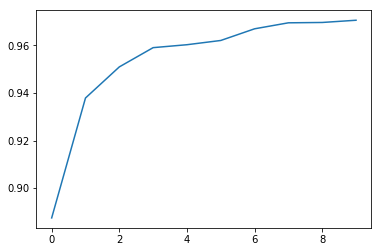

In [52]:
plt.plot([metrics.r2_score(Y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [53]:
# Run it with the estimator (tree in sklearn language) of 20
m = RandomForestRegressor(n_estimators=20,n_jobs=-1)
%time m.fit(X_valid, Y_valid) 
print_score(m)

CPU times: user 288 ms, sys: 4 ms, total: 292 ms
Wall time: 603 ms
[(0.1552694655492784, 0.06292243333755541, 0.8586323144866844, 0.9731581776339407)]


In [54]:
# Run it with the estimator (tree in sklearn language) of 40
m = RandomForestRegressor(n_estimators=40,n_jobs=-1)
%time m.fit(X_valid, Y_valid) 
print_score(m)

CPU times: user 576 ms, sys: 0 ns, total: 576 ms
Wall time: 1.26 s
[(0.15552641273121676, 0.05534375240515581, 0.8581640436179373, 0.979234701291688)]


In [55]:
# Run it with the estimator (tree in sklearn language) of 60
m = RandomForestRegressor(n_estimators=60,n_jobs=-1)
%time m.fit(X_valid, Y_valid) 
print_score(m)

CPU times: user 868 ms, sys: 4 ms, total: 872 ms
Wall time: 1.83 s
[(0.15341463123432353, 0.056219939332884945, 0.8619896705977128, 0.9785719957141573)]


In [56]:
# Run it with the estimator (tree in sklearn language) of 600
m = RandomForestRegressor(n_estimators=600,n_jobs=-1)
%time m.fit(X_valid, Y_valid) 
print_score(m)

CPU times: user 8.6 s, sys: 68 ms, total: 8.67 s
Wall time: 17.4 s
[(0.1512497253720188, 0.05414951035485746, 0.8658572451677439, 0.980121205365539)]


### OOB

Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called out-of-bag (OOB) error which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was not included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our print_score function below.

In [59]:
# Run it with the estimator (tree in sklearn language) of 40
m = RandomForestRegressor(n_estimators=40,n_jobs=-1, oob_score=True)
%time m.fit(X_valid, Y_valid) 
print_score(m)

CPU times: user 584 ms, sys: 4 ms, total: 588 ms
Wall time: 1.24 s
[(0.1535733546604927, 0.056097850029039546, 0.8617039507299233, 0.978664962356046), 0.8461449684526889]
